In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

bc = np.load("data.pickle", allow_pickle=True)
columnNames = ["n_covid_occ", "n_covid_free", "n_ncovid_free", "n_covid_deaths", "n_covid_healed", "n_covid_refused", "n_covid_transfered"]
# global_array = np.array( [np.array(bc["n_covid_occ"]), np.array(bc["n_covid_free"]), \
#                           np.array(bc["n_ncovid_free"]), np.array(bc["n_covid_deaths"]),\
#                           np.array(bc["n_covid_healed"]), np.array(bc["n_covid_refused"]), \
#                           np.array(bc["n_covid_transfered"]) ] )
icu_id=bc["icu_id"]
icu_name=bc["icu_name"] # l'icu_name: nom de l'ICU
message=bc["message"] # message
update_ts=np.array(bc["update_ts"]) # update_ts: derniere mise a jour des information (unix timestamp)
date=np.array(bc["date"])

NColumns=global_array.shape[0]
Ndata = bc.shape[0]

In [2]:
# bc = pd.io.parsers.read_csv("icubam_reprocessed.csv")
# columnNames = ["n_covid_occ", "n_covid_free", "n_ncovid_free", "n_covid_deaths", "n_covid_healed", "n_covid_refused", "n_covid_transfered"]

# from predicu.data import load_and_preprocess_data
# bc = load_and_preprocess_data("bedcount_2020-03-31.pickle")
# columnNames = ['n_covid_free', 'n_covid_occ', 'n_covid_deaths', 'n_covid_healed']
# global_array = np.array( [np.array(bc["n_covid_occ"]), np.array(bc["n_covid_free"]),\
#                           np.array(bc["n_covid_deaths"]), np.array(bc["n_covid_healed"]), ] )
#day=np.array(bc["day"])

{0, 1, 2, 3, 4, 5, 6}

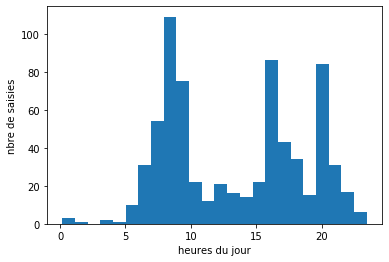

In [3]:
T0 = np.min(update_ts) # premier record (jour)
T0 -= (T0% 86400) # on arrondi au jour (a minuit)
plt.hist(((update_ts-T0)%86400)/3600., bins=24)
plt.xlabel("heures du jour")
plt.ylabel("nbre de saisies")
jours = (update_ts -T0)//86400 
# jours = (update_ts -T0)//(3600*6)  ## 4 dates par jours, 4 quart de journees
nbJours = jours.max() - jours.min() + 1
set(jours)

In [33]:
n_covid_occ= np.array(bc["n_covid_occ"])   # n_covid_occ: nombre de lits de réanimation équipés d'un respirateur occupés
n_covid_free= np.array(bc["n_covid_free"])   # n_covid_free: nombre de lits de réanimation équipés d'un respirateur libres
n_ncovid_free= np.array(bc["n_ncovid_free"])   # n_ncovid_free: nombre de lits de réanimation équipés sans respirateur libres
n_covid_deaths= np.array(bc["n_covid_deaths"])   # n_covid_deaths: nombre de morts liés au COVID (cumulé)
n_covid_healed= np.array(bc["n_covid_healed"])   # n_covid_healed: nombre de guerisson (sortie d'hopital) liés au COVID (cumulé)
n_covid_refused= np.array(bc["n_covid_refused"])   # n_covid_refused: nombre d'admission refusés de COVID (cumulé)
n_covid_transfered= np.array(bc["n_covid_transfered"]) # transferts (cumulé)

n_respi_total = n_covid_occ + n_covid_free
n_avail_beds_total = n_covid_free + n_ncovid_free

In [5]:
N_ICUS =bc["icu_name"].unique().size
N_ICUS, bc["icu_name"].unique()

(39,
 array(['Reims-MIR', 'Mulhouse-SSPI', 'Colmar-NC', 'Tours-MIR', 'C-Rhena',
        'Chateau-Thierry', 'HTP-Med', 'Epinal', 'Mulhouse-Chir',
        'C-Bezannes', 'Verdun', 'Saverne', 'C-Orangerie', 'Claude-B',
        'Nancy-RCP', 'Colmar-Chir', 'Nancy-MIRC', 'Gentilly',
        'CHR-Thionville', 'Haguenau', 'CHR-Mercy', 'NHC-Med', 'St-Dizier',
        'Colmar-Med', 'Essey', 'Charleville-Mezieres', 'HTP-Ped',
        'Mulhouse-MIR', 'Nancy-CCV', 'Nancy-MIRB', 'HTP-Chir',
        'C-Schweitzer', 'NHC-ChirC', 'HPM-Schuman', 'Nancy-ChirB',
        'Nancy-Ped', 'Sarreguemine', 'Troyes', 'St-Avold'], dtype=object))

/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

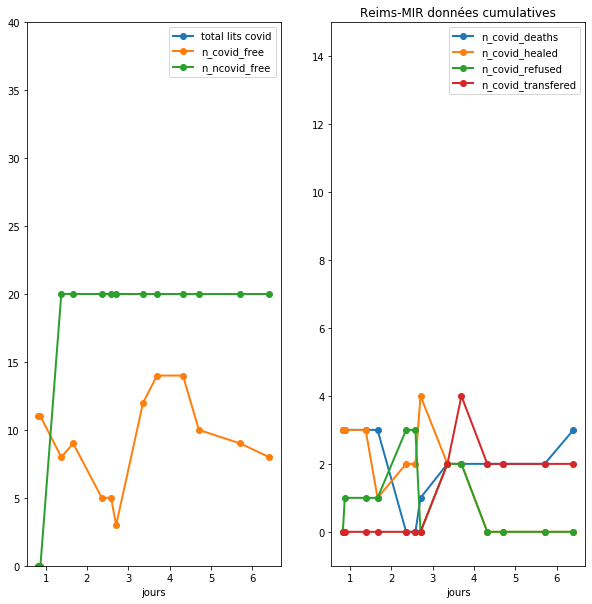

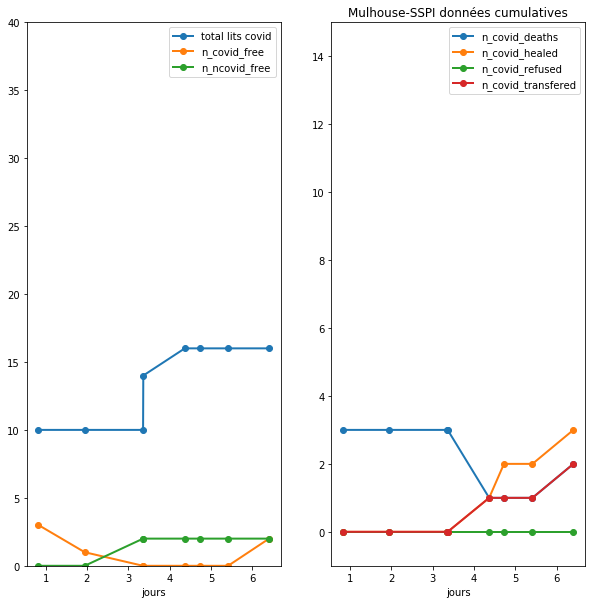

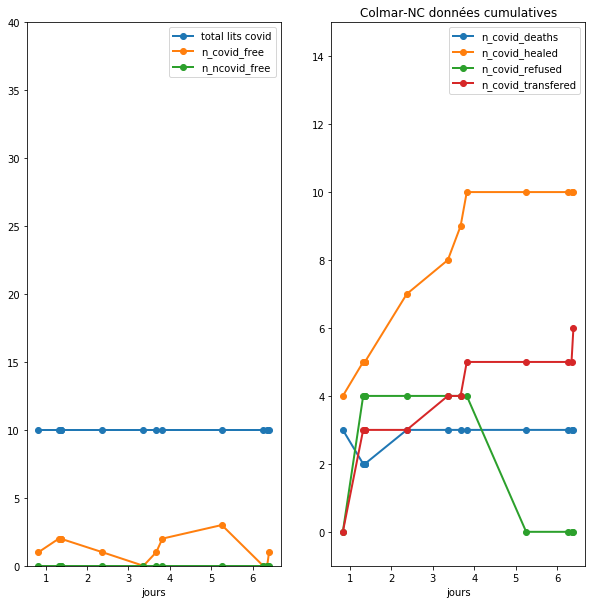

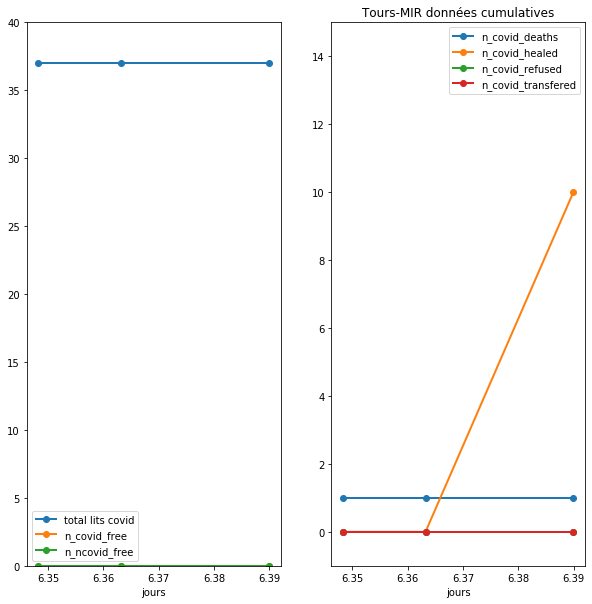

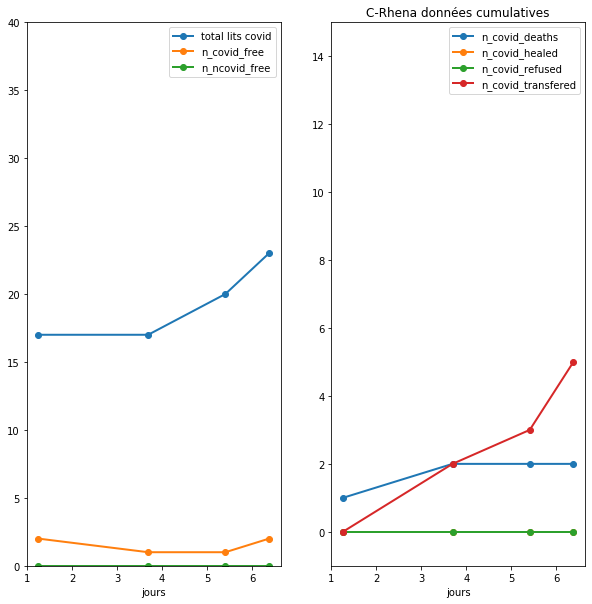

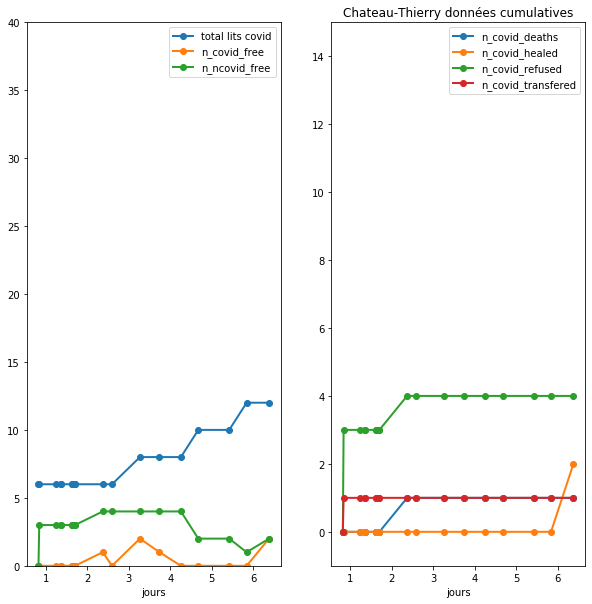

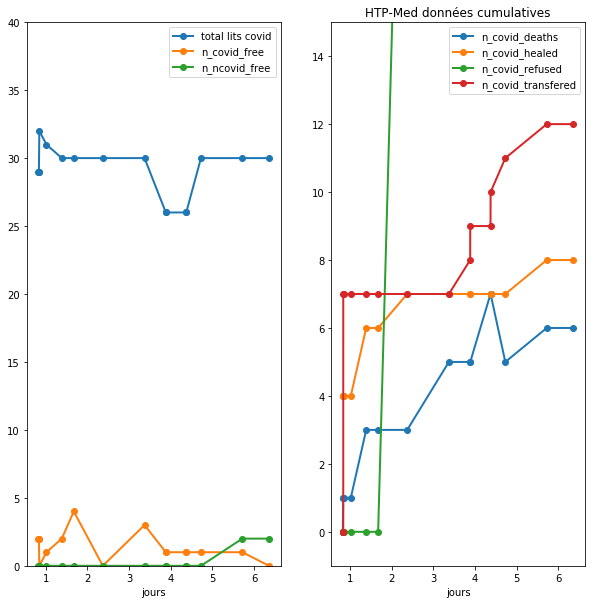

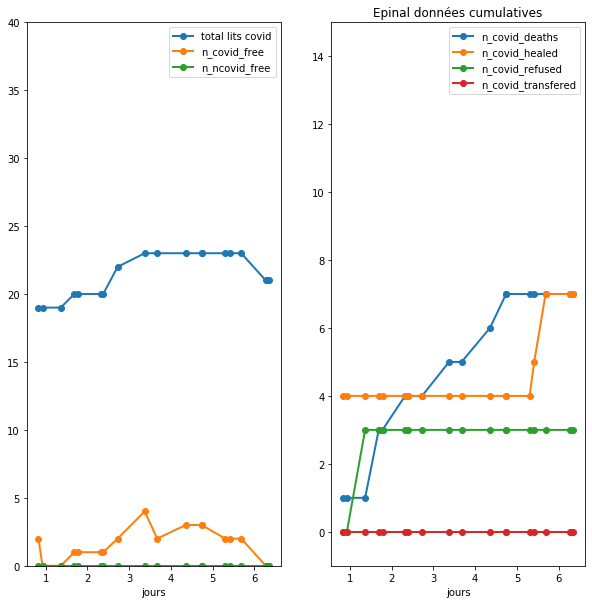

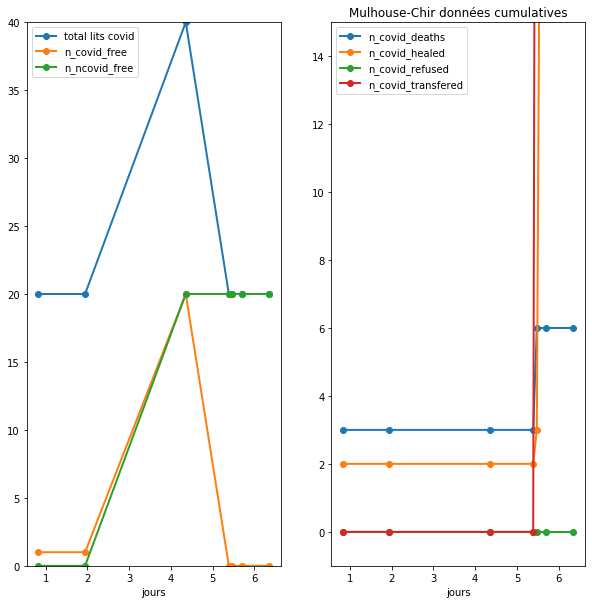

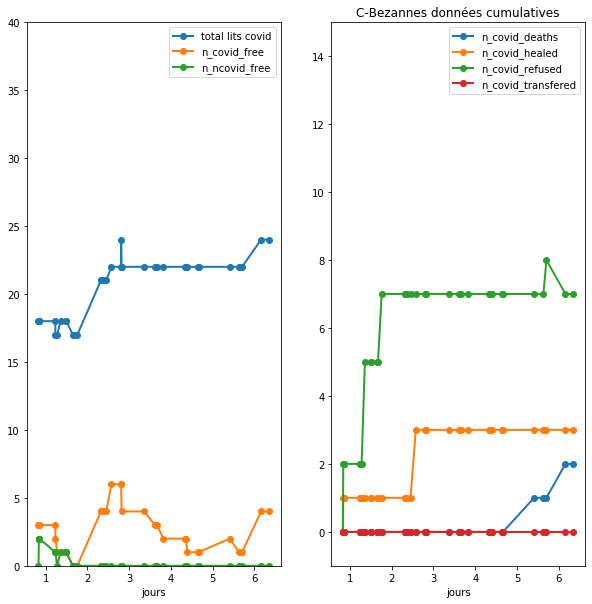

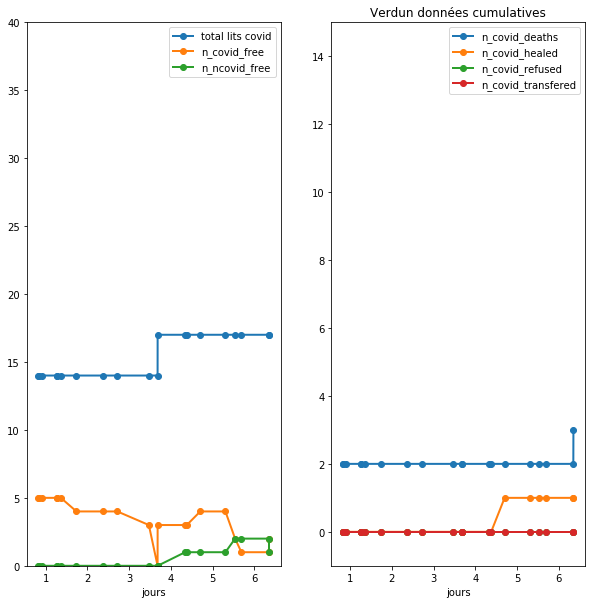

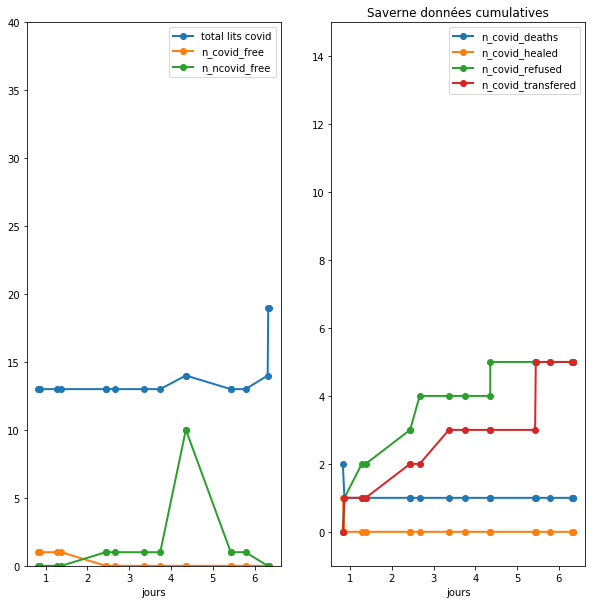

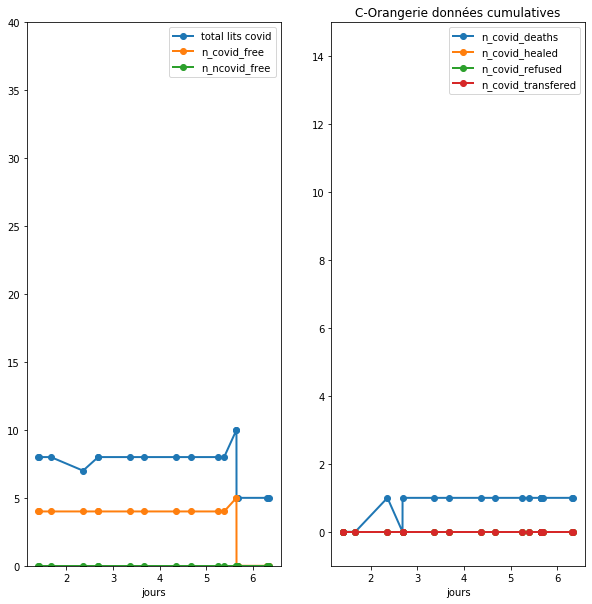

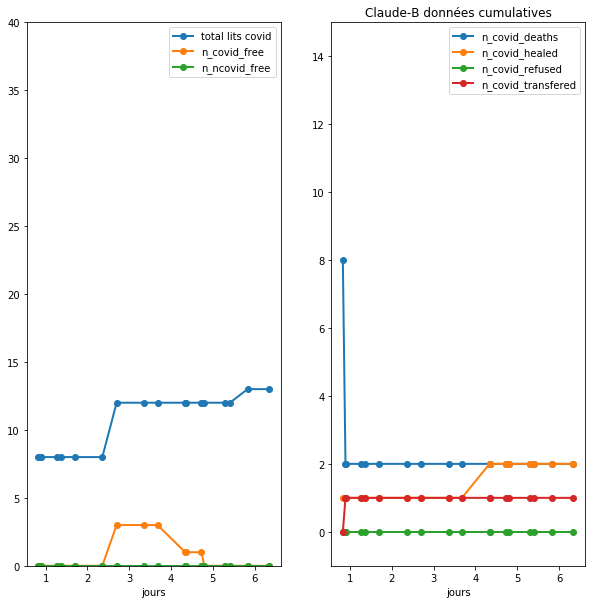

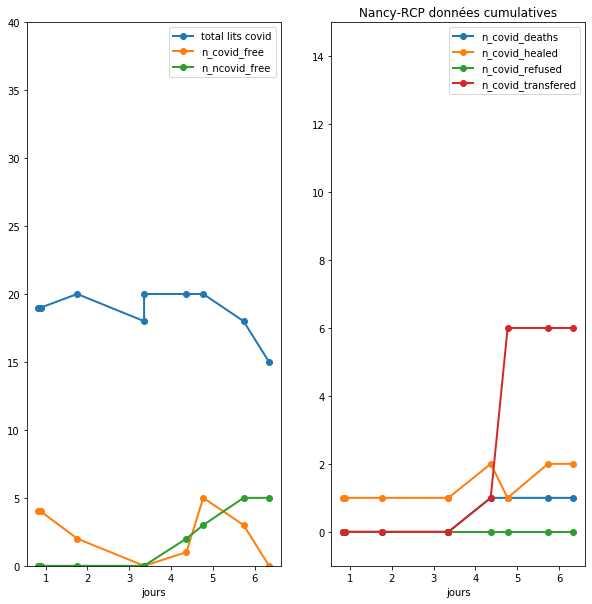

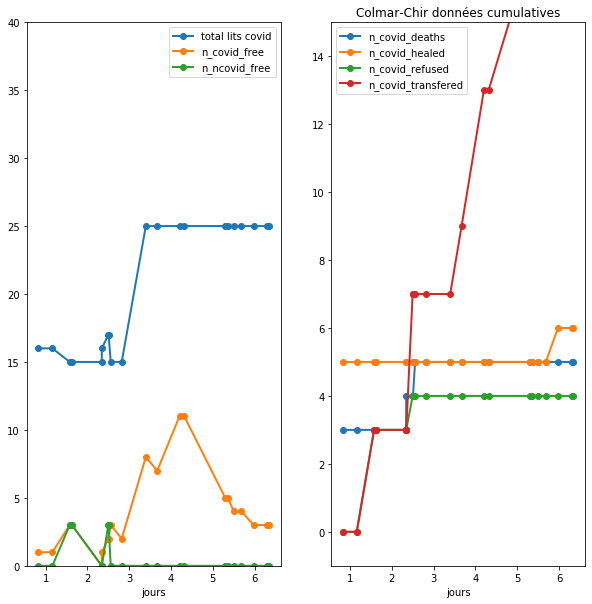

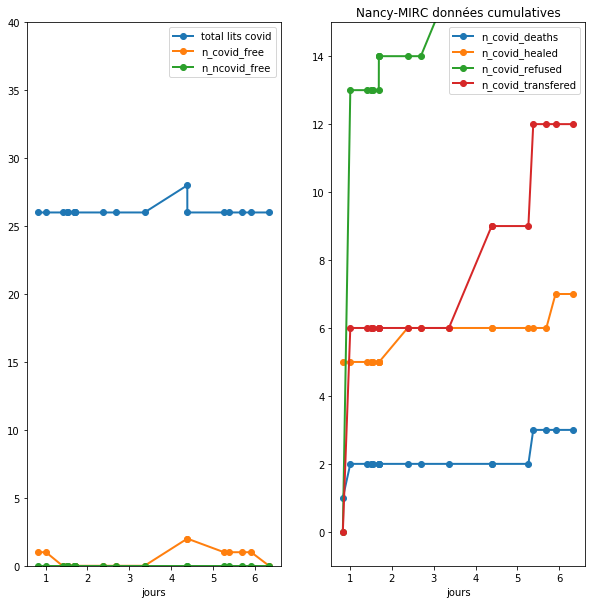

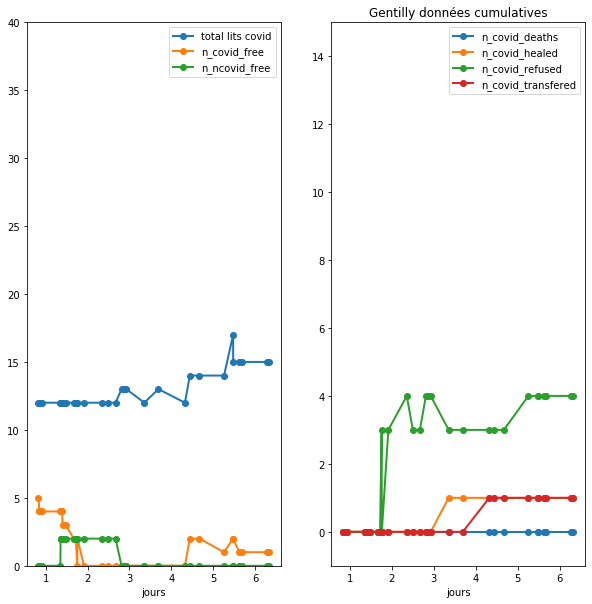

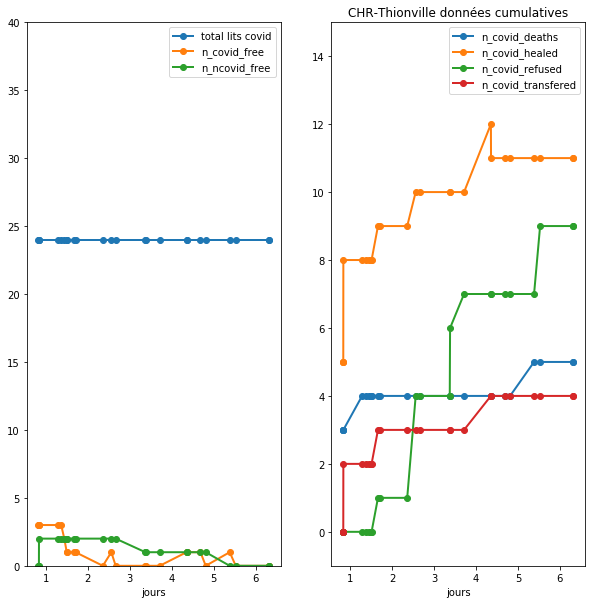

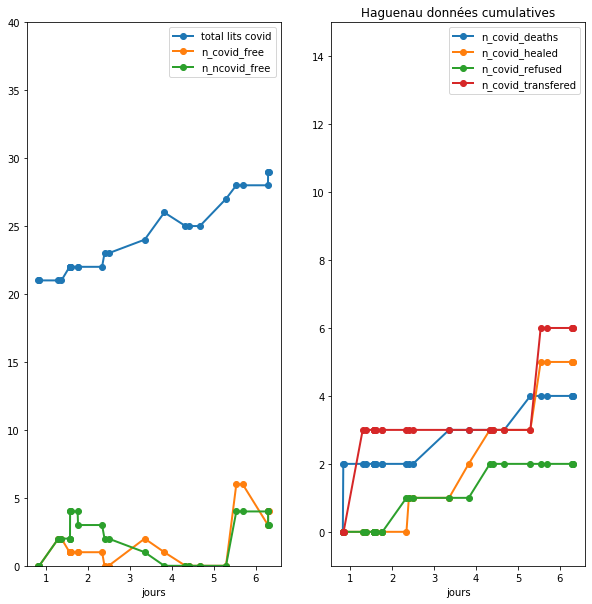

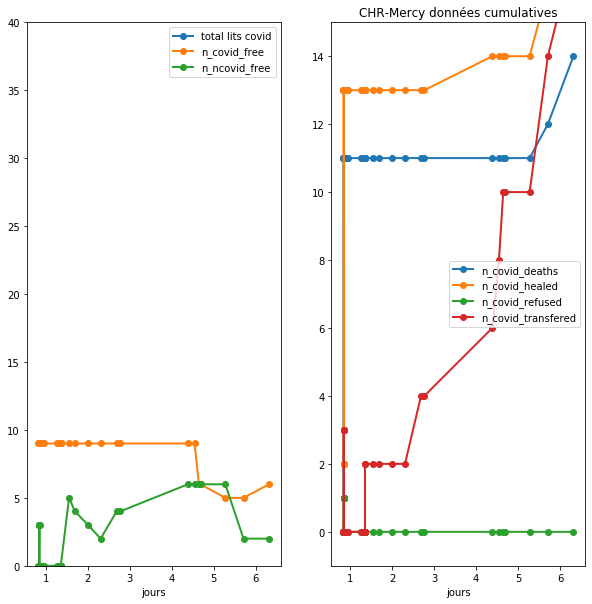

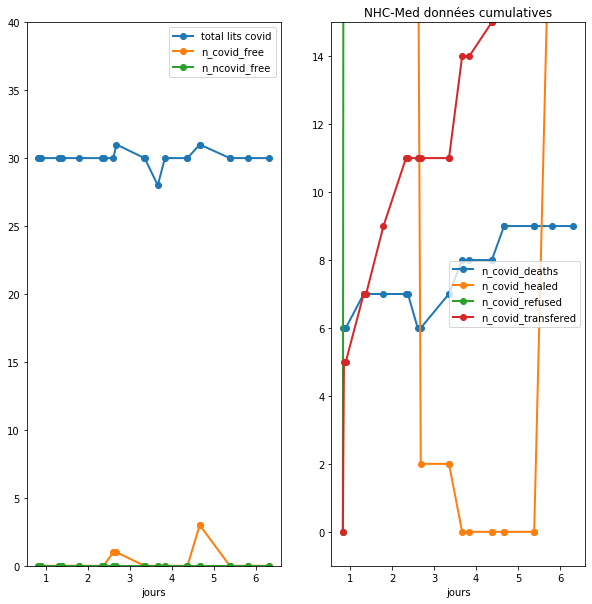

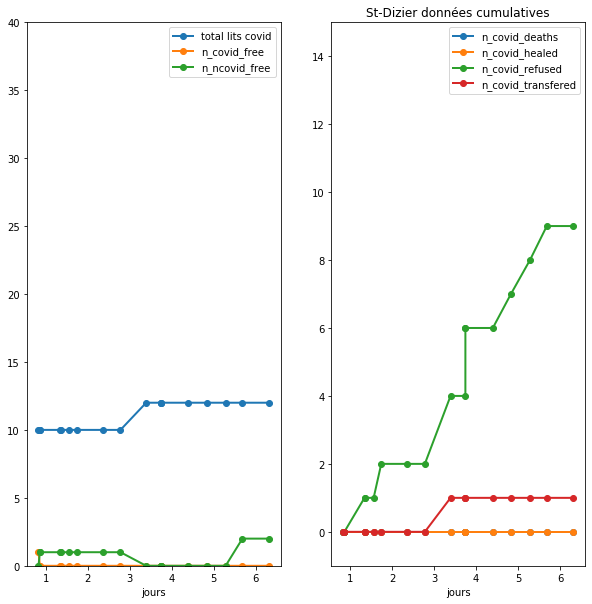

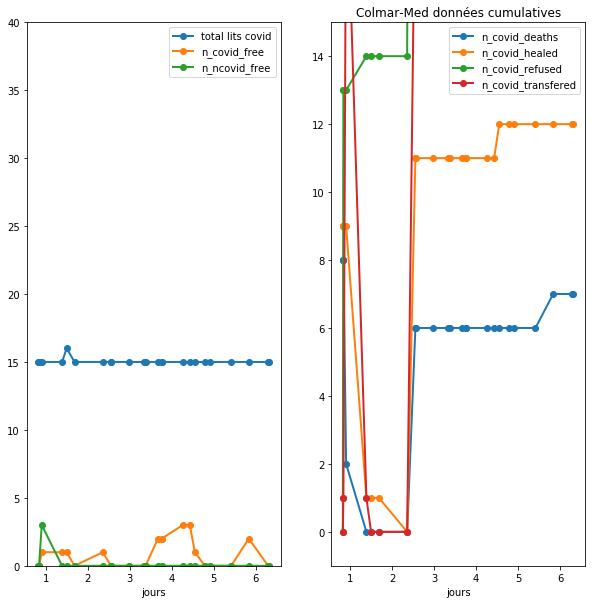

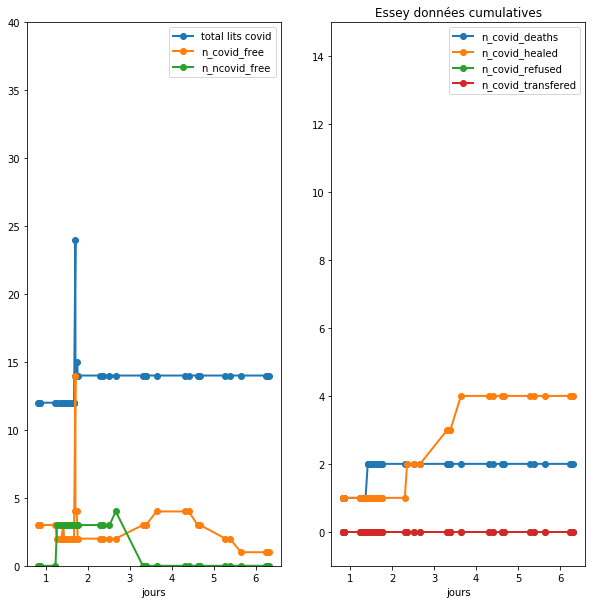

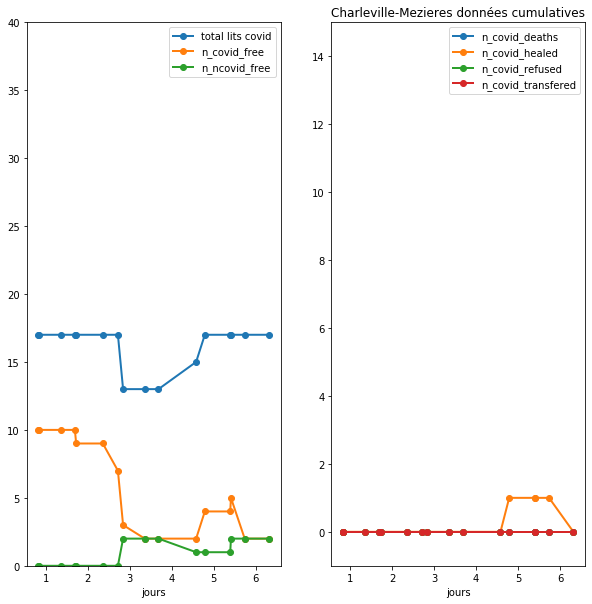

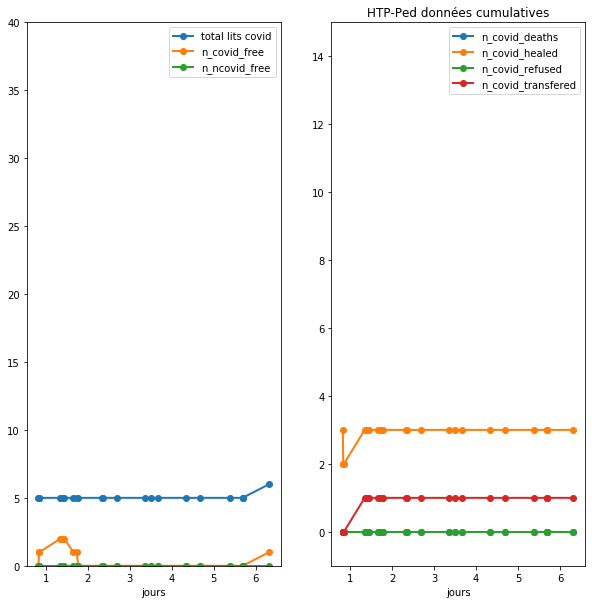

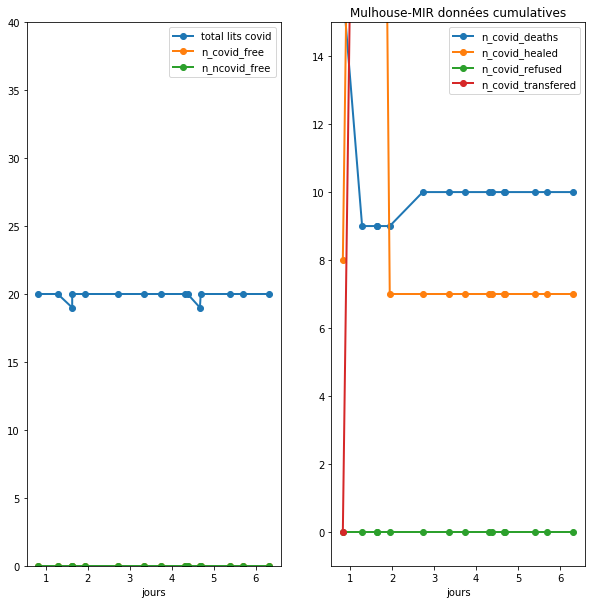

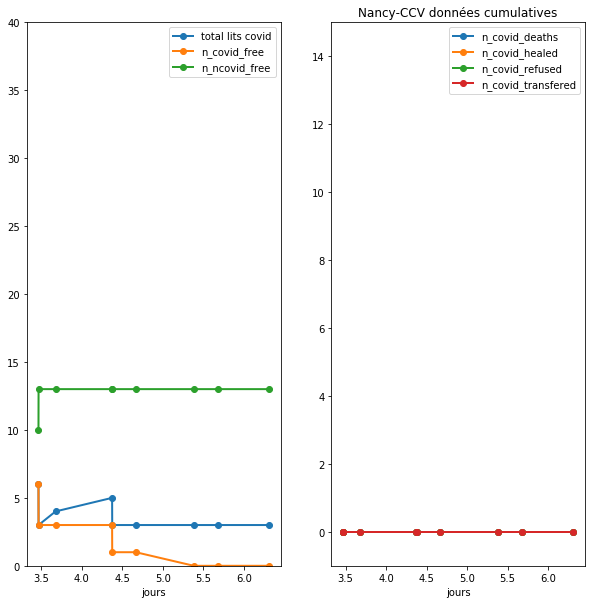

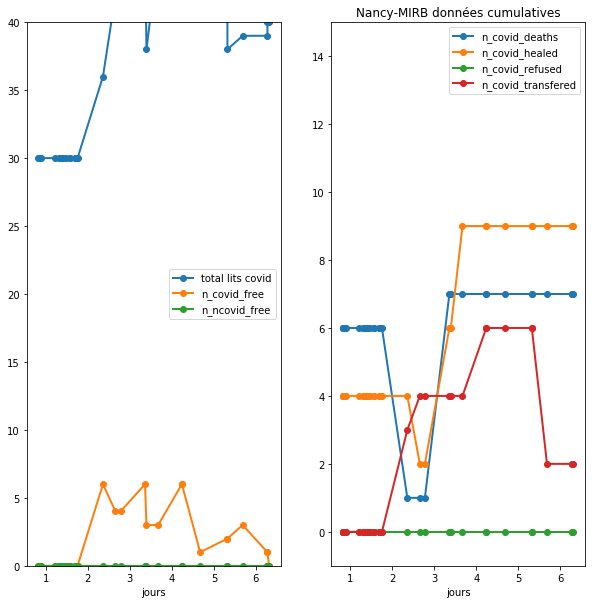

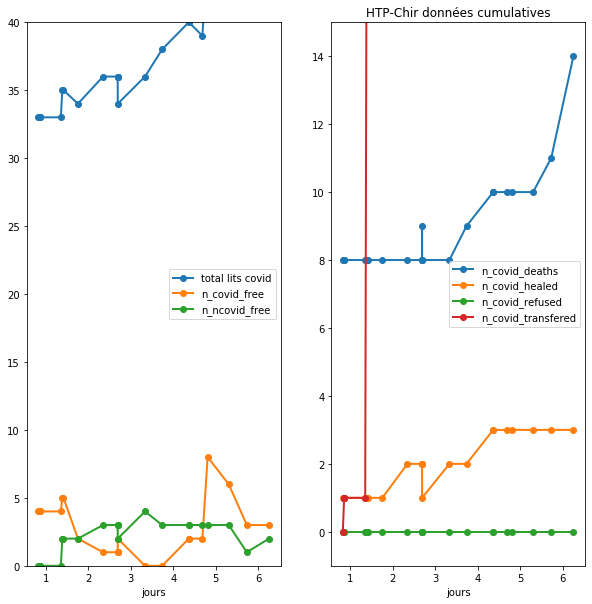

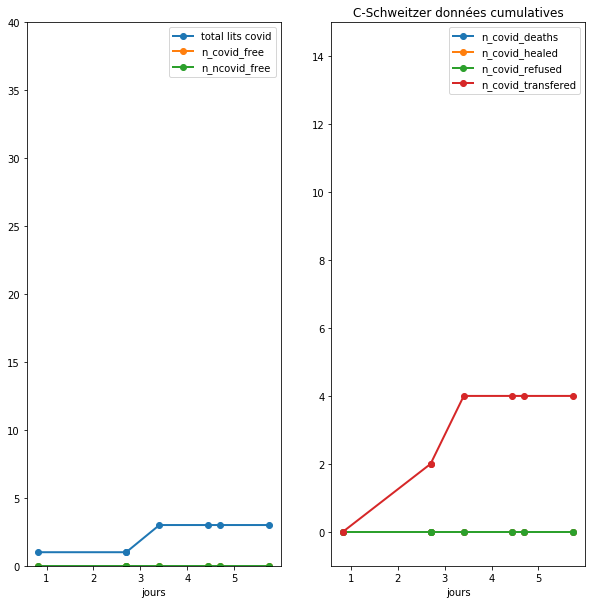

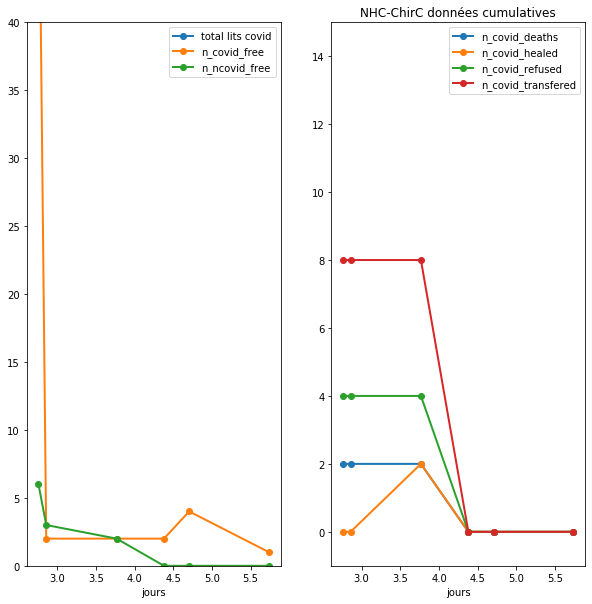

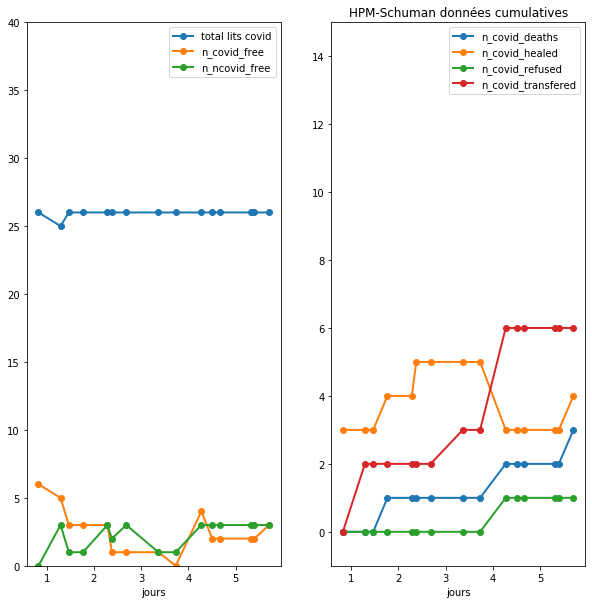

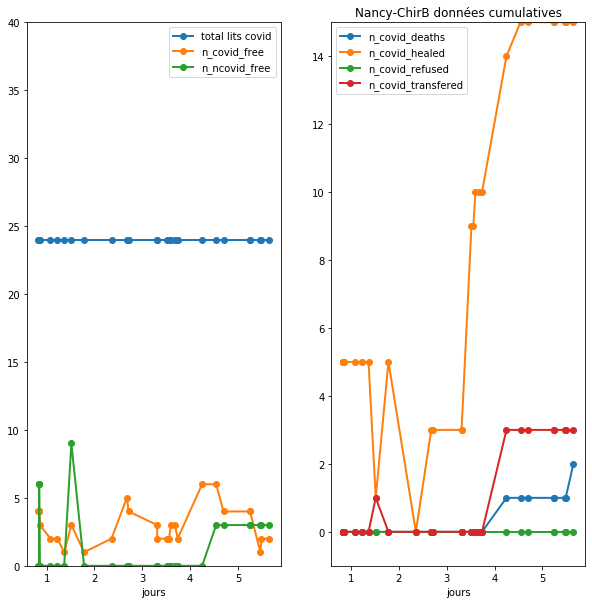

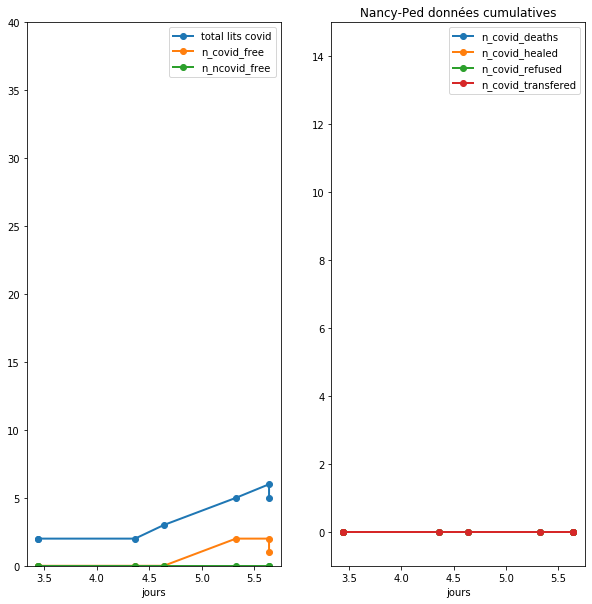

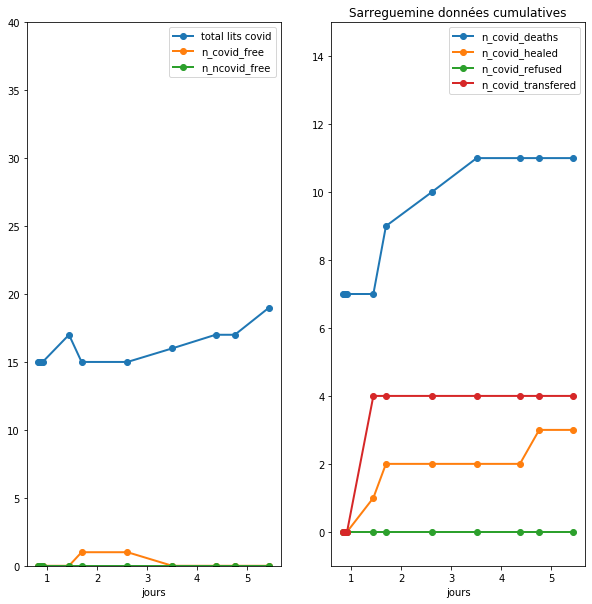

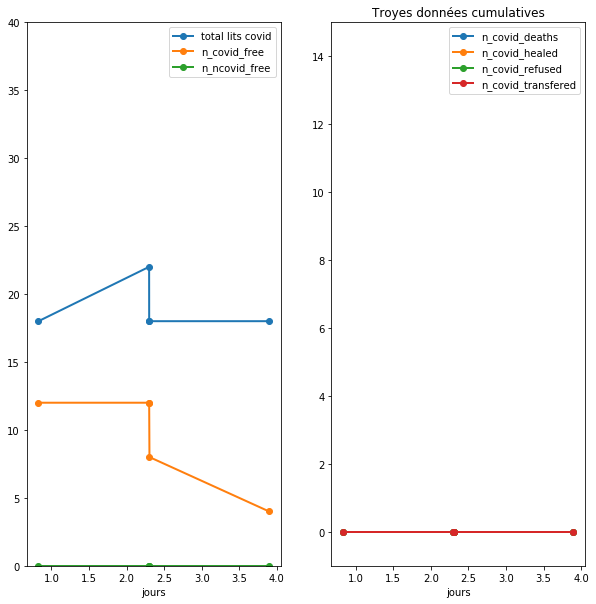

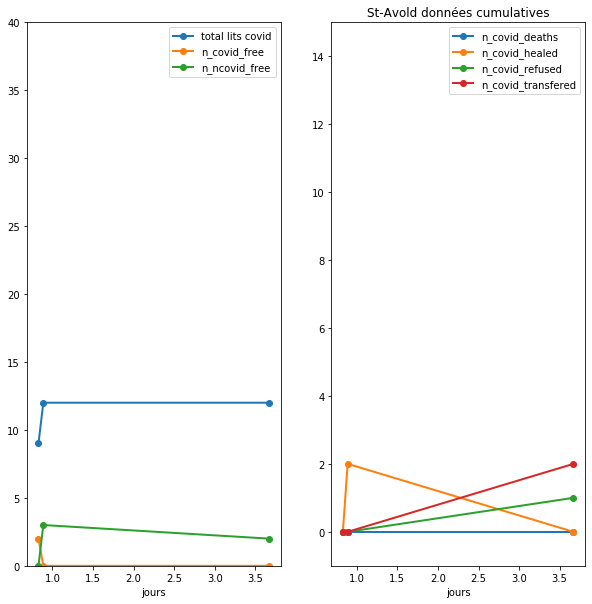

In [62]:
times = (bc['update_ts']-T0)/3600./24.

for icu_num, icu in enumerate(bc["icu_name"].unique()):
    ICUmask = (icu == bc["icu_name"])
    
    plt.figure(icu_num,[10,10])
    plt.title(icu+" données isntantanées")
    
    plt.subplot(1, 2, 1)
    plt.plot(times[ICUmask],n_respi_total[ICUmask] , label='total lits covid' , lw=2, marker='o')
#     colNum =2 
    for colNum in range(1,3):
        colName = columnNames[colNum]
        plt.plot(times[ICUmask],bc[colName][ICUmask] , label=colName , lw=2, marker='o')
    plt.legend()
    plt.ylim([0,40])
    plt.xlabel("jours")
#     plt.savefig("figs/n_occ_"+icu+".png")

    #plt.figure(icu_num*2+1,[10,10])
    plt.subplot(1, 2, 2)
    plt.title(icu+" données cumulatives")
    for colNum in range(3, 7):
        colName = columnNames[colNum]
        plt.plot(times[ICUmask],bc[colName][ICUmask] , label=colName , lw=2, marker='o')
    plt.legend()
    plt.ylim([-1,15])
    plt.xlabel("jours")
    
    plt.savefig("figs/"+icu+"_fixedWindow_avantCorrection"+".png")

In [63]:
cumulative_qties_names = ["n_covid_deaths", "n_covid_healed", "n_covid_refused", "n_covid_transfered", "n_respi_total", "n_avail_beds_total"]
cumulative_qties = [n_covid_deaths, n_covid_healed, n_covid_refused, n_covid_transfered, n_respi_total, n_avail_beds_total]
suspect_icus = 0
clean_data_points = list()
suscpect_icus = np.zeros(N_ICUS)
for icu_num, icu in enumerate(bc["icu_name"].unique()):
    ICUmask = (icu == bc["icu_name"])
    dates = update_ts[ICUmask].copy()
    sorting = np.argsort(dates)
    dates = dates[sorting]
    Ndates = dates.shape[0]
    ## TODO: eliminer les double saisies: 
    ## si 2 saisies l'une a la suite de l'autre (en moins de 15 minutes),
    ## alors la premiere est probablement fausse. 
    ## Idealement, resoudre le confluit automatiqueemnt 
    ## dans tous les cas, raise un warning qui montre/explique ce qui est fait.

    suspicion = 0
    bad_table = np.zeros(4, dtype=bool) ## chaque colonne cumulative est consideree a part, si on veut
    for qty_num in range(4):
        diffe = np.diff(cumulative_qties[qty_num][ICUmask][sorting]) 
#         if (diffe<0).sum()> 1 : # if there are decreases (more than one, which is ok, ) -> bad
        if (diffe<0).sum()> 1 : # if there are decreases (more than one, which is ok, ) -> bad       
    
            # si la derniere valeur est elevee (>=10), c'est p-e bien une cumulative qd meme ?
            if cumulative_qties[qty_num][ICUmask][sorting][-1] >= 6 :
                pass
                # print("il semble cependant que la derniere valeur soit elevee (>=10), et donc c'est p-e bien une cumulative qd meme ? \n", cumulative_qties[qty_num][ICUmask][sorting])
                print("icu:", icu, " - colonne suspecte (mais valeur finale ok?) : ", cumulative_qties_names[qty_num],cumulative_qties[qty_num][ICUmask][sorting])
            else:
                print("icu:", icu, " - colonne suspecte (valeur finale pas ok)   : ", cumulative_qties_names[qty_num],cumulative_qties[qty_num][ICUmask][sorting])
                suspicion += 1
                bad_table[qty_num] = 1
                
    ## TODO: eventuellment: affiner l'heuristique de detection d'erreur:
    ## parfois il y ajuste une erreur une fois, et donc une decroissance anormale en 1 point.
    ## d'autres fois TOUTES les data sont des instantannés et non des cumulatives 
    ## (dans ce cas, il est alors inmportant de supprimer les doubles saisies qui correspondent 
    ## a 2 fois la meme data lors du meem "jour" (duree de moins de 24h en fait))


    local_n_covid_occ = n_covid_occ[ICUmask][sorting]
    local_n_covid_free = n_covid_free[ICUmask][sorting]
    local_n_ncovid_free = n_ncovid_free[ICUmask][sorting]
    local_update_ts = dates.copy()
    if suspicion >= 1:
#         print("auto-correction des donnees: on les rend cumulatives (soit toutes, soit aucune.. TODO: ameliorer ce choix, raffiner")
        ## TODO: affinage possible : 
        ## ne corriger que les colonnes percues comme defauillantes...
        ## mais c'est un peu bizzare que seulement certaines colonnes soient saisies en cumulé et d'autres non,
        ## je trouve. Donc attention.
        local_n_covid_deaths = np.cumsum(n_covid_deaths[ICUmask][sorting])
        local_n_covid_healed = np.cumsum(n_covid_healed[ICUmask][sorting])
        local_n_covid_refused = np.cumsum(n_covid_refused[ICUmask][sorting])
        local_n_covid_transfered = np.cumsum(n_covid_transfered[ICUmask][sorting])
        suscpect_icus[icu_num] = 1
    else:
#         print("icu", icu, " : bizzare !! seulement certaines colonnes sont suspectes ?\nOn ne corrige rien, du coup.. ?")
        local_n_covid_deaths = n_covid_deaths[ICUmask][sorting]
        local_n_covid_healed = n_covid_healed[ICUmask][sorting]
        local_n_covid_refused = n_covid_refused[ICUmask][sorting]
        local_n_covid_transfered = n_covid_transfered[ICUmask][sorting]

    for i, date in enumerate(dates):
        new_data_point = {'date': date,\
                            'icu_name': icu, \
                            'n_covid_occ' : local_n_covid_occ[i], \
                            'n_covid_free' : local_n_covid_free[i], \
                            'n_ncovid_free' : local_n_ncovid_free[i], \
                            'n_covid_deaths' : local_n_covid_deaths[i], \
                            'n_covid_healed' : local_n_covid_healed[i], \
                            'n_covid_refused' : local_n_covid_refused[i], \
                            'n_covid_transfered' : local_n_covid_transfered[i], \
                            'update_ts' : local_update_ts[i]}
        clean_data_points.append(new_data_point)

bc_corrected = pd.DataFrame(clean_data_points)
suscpect_icus, suscpect_icus.sum()

icu: Reims-MIR  - colonne suspecte (valeur finale pas ok)   :  n_covid_healed [3 3 3 1 2 2 4 2 2 0 0 0 0]
icu: Reims-MIR  - colonne suspecte (valeur finale pas ok)   :  n_covid_refused [0 1 1 1 3 3 0 2 2 0 0 0 0]
icu: Gentilly  - colonne suspecte (valeur finale pas ok)   :  n_covid_refused [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 4 3 3 4 4 4 3 3 3 3 3 4 4 4 4 4 4 4]
icu: NHC-Med  - colonne suspecte (mais valeur finale ok?) :  n_covid_healed [18 18 18 18 19 19 19 19 19 21  2  2  2  0  0  0  0  0  0  0  0 22 22]
icu: Colmar-Med  - colonne suspecte (mais valeur finale ok?) :  n_covid_deaths [8 8 8 2 0 0 0 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7]
icu: Colmar-Med  - colonne suspecte (mais valeur finale ok?) :  n_covid_healed [ 9  9  9  9  1  1  1  0 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12
 12]
icu: Colmar-Med  - colonne suspecte (mais valeur finale ok?) :  n_covid_transfered [ 0  1  1 20  1  0  0  0 20 20 22 22 22 25 26 26 27 27 28 28 28 28 30 30
 30]
icu: Nancy-ChirB  - colonne suspecte (m

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 2.0)

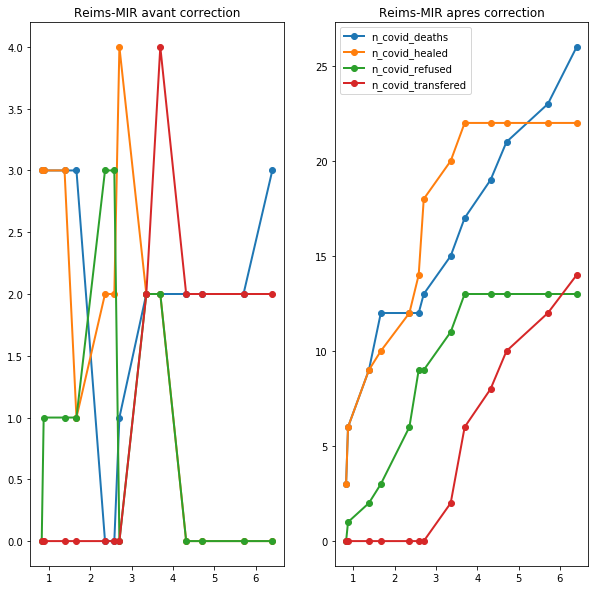

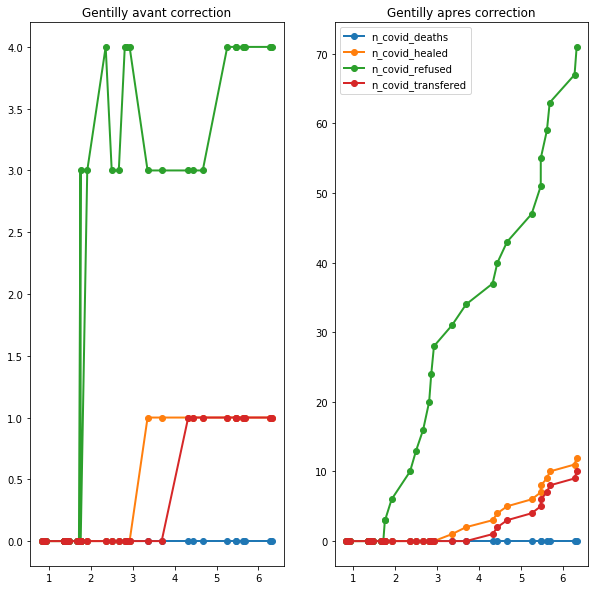

In [64]:
## plots avant/apres pour validation facile (visuelle, idealement en faisant defiler 
## des .png depuis un visionneur d'images) par un expert (medecin)

times = (bc['update_ts']-T0)/3600./24.
times_corr = (bc_corrected['update_ts']-T0)/3600./24.
columnNames = ["n_covid_occ", "n_covid_free", "n_ncovid_free", "n_covid_deaths", "n_covid_healed", "n_covid_refused", "n_covid_transfered"]

for icu_num, icu in enumerate(bc["icu_name"].unique()):

    if suscpect_icus[icu_num] == 1:
        ## les 3 premiere scolonnes en sont pas changees ni validees, pour le moment

        # plt.figure(icu_num*2,[10,10])
        # ## before correction
        # ICUmask = (icu == bc["icu_name"])
        # plt.subplot(1, 2, 1)
        # plt.title(icu+ " avant correction")
        # for colNum in range(3):
        #     colName = columnNames[colNum]
        #     plt.plot(times[ICUmask],bc[colName][ICUmask] , label=colName ,lw=2, marker='o')

        # ## after correction
        # ICUmaskCorr = (icu == bc_corrected["icu_name"])
        # plt.subplot(1, 2, 2)
        # plt.title(icu+ " apres correction")
        # for colNum in range(3):
        #     colName = columnNames[colNum]
        #     plt.plot(times_corr[ICUmaskCorr],bc_corrected[colName][ICUmaskCorr] , label=colName ,lw=2, marker='o')

        plt.figure(icu_num*2+1,[10,10])
        ## before correction
        ICUmask = (icu == bc["icu_name"])
        plt.subplot(1, 2, 1)
        plt.title(icu+ " avant correction")
        for colNum in range(3,7):
            colName = columnNames[colNum]
            plt.plot(times[ICUmask],bc[colName][ICUmask] , label=colName ,lw=2, marker='o')

        ## after correction
        ICUmaskCorr = (icu == bc_corrected["icu_name"])
        plt.subplot(1, 2, 2)
        plt.title(icu+ " apres correction")
        for colNum in range(3,7):
            colName = columnNames[colNum]
            plt.plot(times_corr[ICUmaskCorr],bc_corrected[colName][ICUmaskCorr] , label=colName ,lw=2, marker='o')
        plt.legend()
        plt.savefig("figs/"+icu+"avant-apres.png")


In [65]:
## TODO : une idee a explorer:
# valider la coherence des resultats en terme du fait que le nombre d'entrants net a l'hopital ne peut jamais etre negatif


# for icuNumber, icu in enumerate(bc["icu_name"].unique()):
def test_validite_nbre_entrants(icu, bc):
    n_covid_occ= np.array(bc["n_covid_occ"])   # n_covid_occ: nombre de lits de réanimation équipés d'un respirateur occupés
    n_covid_free= np.array(bc["n_covid_free"])   # n_covid_free: nombre de lits de réanimation équipés d'un respirateur libres
    n_ncovid_free= np.array(bc["n_ncovid_free"])   # n_ncovid_free: nombre de lits de réanimation équipés sans respirateur libres
    n_covid_deaths= np.array(bc["n_covid_deaths"])   # n_covid_deaths: nombre de morts liés au COVID (cumulé)
    n_covid_healed= np.array(bc["n_covid_healed"])   # n_covid_healed: nombre de guerisson (sortie d'hopital) liés au COVID (cumulé)
    n_covid_refused= np.array(bc["n_covid_refused"])   # n_covid_refused: nombre d'admission refusés de COVID (cumulé)
    n_covid_transfered= np.array(bc["n_covid_transfered"]) # transferts (cumulé)

    n_respi_total = n_covid_occ + n_covid_free
    n_avail_beds_total = n_covid_free + n_ncovid_free
    
    ICUmask = (icu == bc["icu_name"])
    dates = jours[ICUmask]
    sorting = np.argsort(dates)
    dates = dates[sorting]
    n_admis_brut = np.diff( n_covid_occ[ICUmask][sorting])
    n_admis_net = \
      np.diff( n_covid_occ   [ICUmask][sorting])  \
    + np.diff( n_covid_deaths[ICUmask][sorting])     \
    + np.diff( n_covid_healed[ICUmask][sorting]) #   + np.diff(n_covid_transfered[ICUmask][sorting])
    
    ## TODO: affiner la logique du bilan à appliquer.
    ## p-e certains patient migrent ils par des chemins que je n'ai pas envisagés ?
    
    if (n_admis_net<0).sum() >0 :
        print("WARNING ! ", icu, " le nombre d'entrants entre deux enregistrements ne devrait jamais etre negatif !!")
        print("nbre d'admis Delta(lits occupes)+Delta(nb morts)+Delta(healed), sans compter les transferts ni refus: ", n_admis_net)
        return (n_admis_net<0).sum() 
    return 0

icu = "Reims-MIR"
test_validite_nbre_entrants(icu, bc_corrected)

for icu in bc["icu_name"].unique():
    test_validite_nbre_entrants(icu, bc_corrected)
#test_validite_nbre_entrants(icu), ICUmask, n_covid_total[ICUmask][sorting], dates, n_covid_deaths[ICUmask][sorting], n_covid_healed[ICUmask][sorting]

WARNING !  Colmar-NC  le nombre d'entrants entre deux enregistrements ne devrait jamais etre negatif !!
nbre d'admis Delta(lits occupes)+Delta(nb morts)+Delta(healed), sans compter les transferts ni refus:  [-1  0  0  0  4  2  0  0 -1  3  0 -1]
WARNING !  Chateau-Thierry  le nombre d'entrants entre deux enregistrements ne devrait jamais etre negatif !!
nbre d'admis Delta(lits occupes)+Delta(nb morts)+Delta(healed), sans compter les transferts ni refus:  [-2  0 -2 -1 -1  6 -6 -1  0  0  0  0  0  0  0  0  0  0]
WARNING !  HTP-Med  le nombre d'entrants entre deux enregistrements ne devrait jamais etre negatif !!
nbre d'admis Delta(lits occupes)+Delta(nb morts)+Delta(healed), sans compter les transferts ni refus:  [ 1  0  5 -2  2 -2  5 -1 -2  0  2  0  2  2  1]
WARNING !  Epinal  le nombre d'entrants entre deux enregistrements ne devrait jamais etre negatif !!
nbre d'admis Delta(lits occupes)+Delta(nb morts)+Delta(healed), sans compter les transferts ni refus:  [13  0 -2 -1 -1  0 -1  5 -5 -2